<a href="https://colab.research.google.com/github/ArunNandam/python/blob/main/Usage.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
from google.colab import files
up = files.upload()

Saving usage.csv to usage.csv


In [ ]:
import io
df = pd.read_csv(io.BytesIO(up['usage.csv']))

In [ ]:
df

,Days,July_Usage(hr),July_Usage(min),July_Usage(tot)
0,1,2.0,3.0,123.0
1,2,4.0,9.0,249.0
2,3,6.0,14.0,374.0
3,4,4.0,41.0,281.0
4,5,6.0,1.0,361.0
5,6,5.0,18.0,318.0
6,7,5.0,32.0,332.0
7,8,5.0,47.0,347.0
8,9,5.0,21.0,321.0
9,10,6.0,0.0,360.0


In [ ]:
df = df.dropna()

In [ ]:
df = df.set_index('Days')

In [ ]:
df

,July_Usage(hr),July_Usage(min),July_Usage(tot)
Days,,,
1,2.0,3.0,123.0
2,4.0,9.0,249.0
3,6.0,14.0,374.0
4,4.0,41.0,281.0
5,6.0,1.0,361.0
6,5.0,18.0,318.0
7,5.0,32.0,332.0
8,5.0,47.0,347.0
9,5.0,21.0,321.0


In [ ]:
df['July_Usage(hr)']

Days
1     2.0
2     4.0
3     6.0
4     4.0
5     6.0
6     5.0
7     5.0
8     5.0
9     5.0
10    6.0
11    4.0
12    5.0
13    3.0
14    4.0
15    3.0
16    6.0
17    5.0
18    6.0
19    7.0
Name: July_Usage(hr), dtype: float64

In [ ]:
df.loc[1]
#rows can be accessed using loc

July_Usage(hr)       2.0
July_Usage(min)      3.0
July_Usage(tot)    123.0
Name: 1, dtype: float64

In [ ]:
df.loc[19]['July_Usage(hr)'] = 9
df.loc[19]['July_Usage(min)'] = 58
df.loc[19]['July_Usage(tot)'] = df.loc[19]['July_Usage(hr)']*60 +df.loc[19]['July_Usage(min)']

In [ ]:
df

,July_Usage(hr),July_Usage(min),July_Usage(tot)
Days,,,
1,2.0,3.0,123.0
2,4.0,9.0,249.0
3,6.0,14.0,374.0
4,4.0,41.0,281.0
5,6.0,1.0,361.0
6,5.0,18.0,318.0
7,5.0,32.0,332.0
8,5.0,47.0,347.0
9,5.0,21.0,321.0


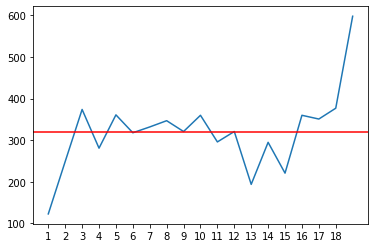

In [ ]:
plt.plot(df['July_Usage(tot)'])
plt.axhline(np.mean(df['July_Usage(tot)']),color='r',linestyle = '-')
plt.xticks(np.arange(1,19))
plt.show()

In [ ]:
np.mean(df['July_Usage(tot)'])/60

5.332456140350877

In [ ]:
df = df.reset_index()

In [ ]:
X=df[['Days']]
y=df['July_Usage(tot)']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

In [ ]:
y_train

9     360.0
11    321.0
14    221.0
0     123.0
10    296.0
3     281.0
4     361.0
16    351.0
5     318.0
18    598.0
17    377.0
6     332.0
13    295.0
2     374.0
8     321.0
Name: July_Usage(tot), dtype: float64

In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
model.score(X_train,y_train)

0.24662089291077186

In [ ]:
y = model.predict(X_test)

In [ ]:
err = (y_test - y)**2

In [ ]:
y, y_test, y_train

(array([379.81850015, 310.75984826, 258.96585935, 353.92150569]), 15    360.0
 7     347.0
 1     249.0
 12    194.0
 Name: July_Usage(tot), dtype: float64, 9     360.0
 11    321.0
 14    221.0
 0     123.0
 10    296.0
 3     281.0
 4     361.0
 16    351.0
 5     318.0
 18    598.0
 17    377.0
 6     332.0
 13    295.0
 2     374.0
 8     321.0
 Name: July_Usage(tot), dtype: float64)